In [1]:
from google.colab import drive

In [2]:
drive.mount('../content/drive')

Drive already mounted at ../content/drive; to attempt to forcibly remount, call drive.mount("../content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/drive/My Drive/PGDSBA/Machine Learning/Alternate Project/Cars (2) (1).csv')
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [5]:
print('number of rows:',df.shape[0])
print('number of columns:',df.shape[1])


number of rows: 444
number of columns: 9


In [6]:
df.size

3996

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [8]:
df.dtypes

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [9]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [10]:
df.duplicated().sum()

0

**Univariate Analysis**

Checking for the categorical data types

In [11]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())

Age
26    63
27    49
24    46
28    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
34    11
33    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
18     2
35     2
42     1
19     1
43     1
Name: Age, dtype: int64
Gender
Male      316
Female    128
Name: Gender, dtype: int64
Engineer
1    335
0    109
Name: Engineer, dtype: int64
MBA
0    332
1    112
Name: MBA, dtype: int64
Work Exp
4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
20     6
21     6
12     5
16     5
18     5
22     3
13     3
15     2
17     2
24     1
Name: Work Exp, dtype: int64
Salary
14.6    22
8.5     13
13.6    12
12.8    12
8.6     11
        ..
57.0     1
52.0     1
11.9     1
55.0     1
41.9     1
Name: Salary, Length: 122, dtype: int64
Distance
12.2    12
8.1     11
9.0      9
11.7     8
10.0     7
        ..
20.8     1
6.9      1
18.8     1
17.7     1
4.5      1
Name: Distance, Length: 137, dt

From the above it is clear that the Categorical variables are :

1. Gender
2. Engineer
3. MBA
4. License
5. Transport

**Now changing the data types of the categorical variables**

In [12]:
cat = ['Gender','Engineer','MBA','license','Transport']
for col in cat:
  df[col]=df[col].astype('object')

In [13]:
df.dtypes

Age            int64
Gender        object
Engineer      object
MBA           object
Work Exp       int64
Salary       float64
Distance     float64
license       object
Transport     object
dtype: object

In [14]:
for col in df.columns:
  if df[col].dtype=='object':
    print(col)
    print(df[col].value_counts())

Gender
Male      316
Female    128
Name: Gender, dtype: int64
Engineer
1    335
0    109
Name: Engineer, dtype: int64
MBA
0    332
1    112
Name: MBA, dtype: int64
license
0    340
1    104
Name: license, dtype: int64
Transport
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64


In [15]:
table=pd.pivot_table(df,index=['Transport','Gender'],aggfunc={'Age':np.mean,'Distance':np.mean,'Salary':np.mean,'Work Exp':np.mean,'license':np.count_nonzero,'MBA':np.count_nonzero,'Engineer':np.count_nonzero})
table

Age   Distance  ...   Work Exp  license
Transport         Gender                        ...                    
Private Transport Female  27.411765  12.884314  ...   6.372549       10
                  Male    30.946237  13.719355  ...  10.397849       61
Public Transport  Female  26.831169   9.779221  ...   5.103896        0
                  Male    26.807175  10.500000  ...   4.986547       33

[4 rows x 7 columns]

Making different list for categorical columns and numerical columns

In [16]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Gender', 'Engineer', 'MBA', 'license', 'Transport']
num =  ['Age', 'Work Exp', 'Salary', 'Distance']


Description of Categorical and Numerical Variables

In [17]:
df[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Engineer,444,2,1,335
MBA,444,2,0,332
license,444,2,0,340
Transport,444,2,Public Transport,300


In [18]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4


**Univariate Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff689ca52b0>,
      dtype=object)

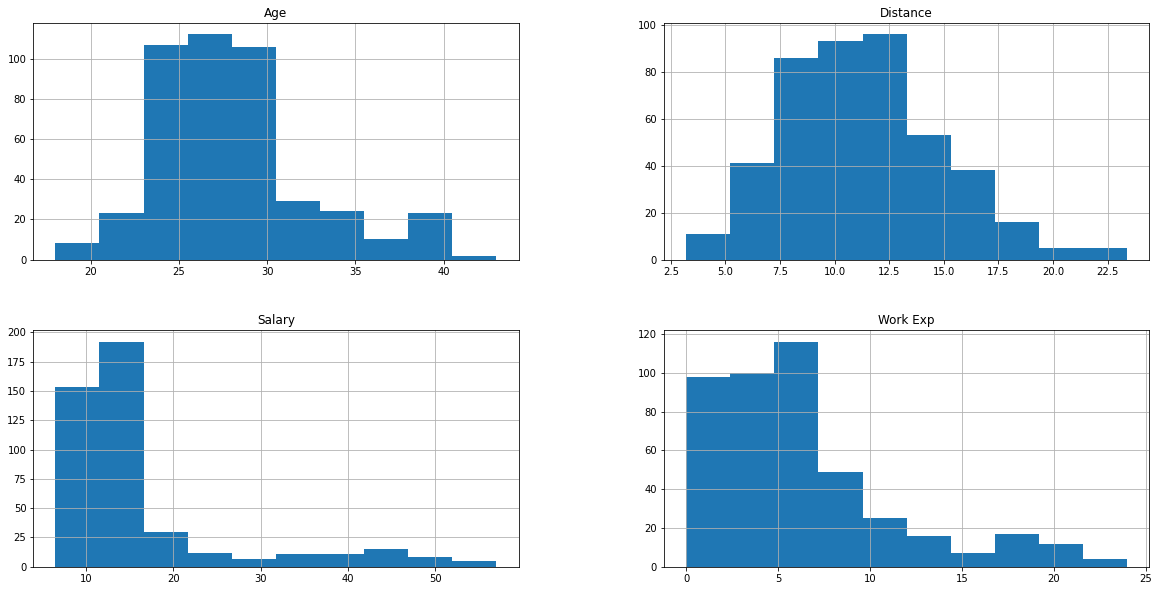

In [19]:
df[num].hist(figsize=(20,10))

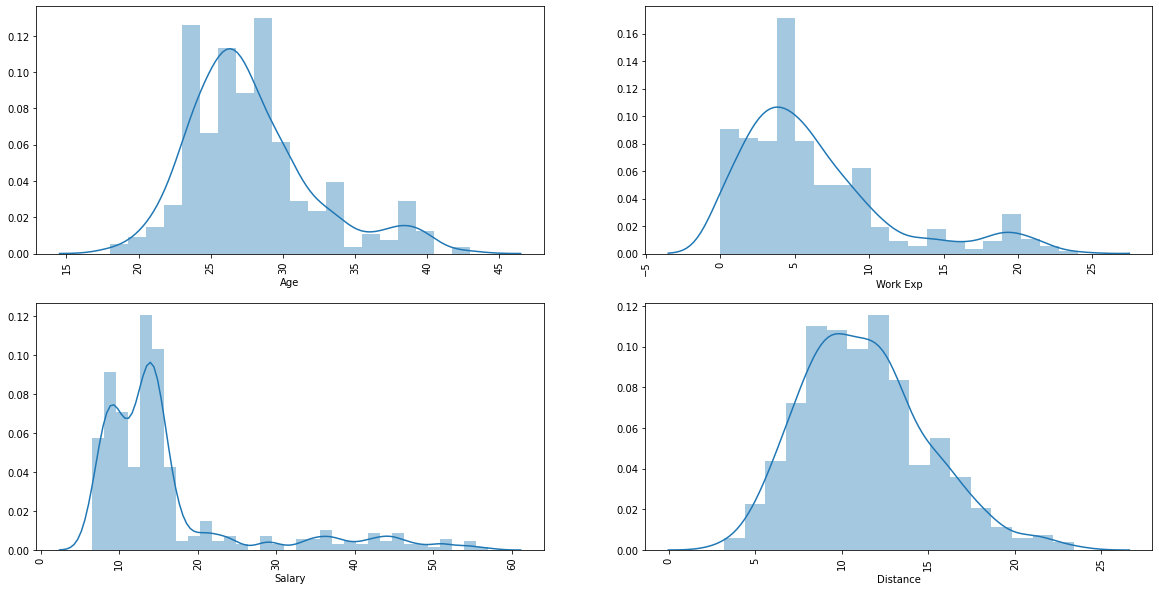

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

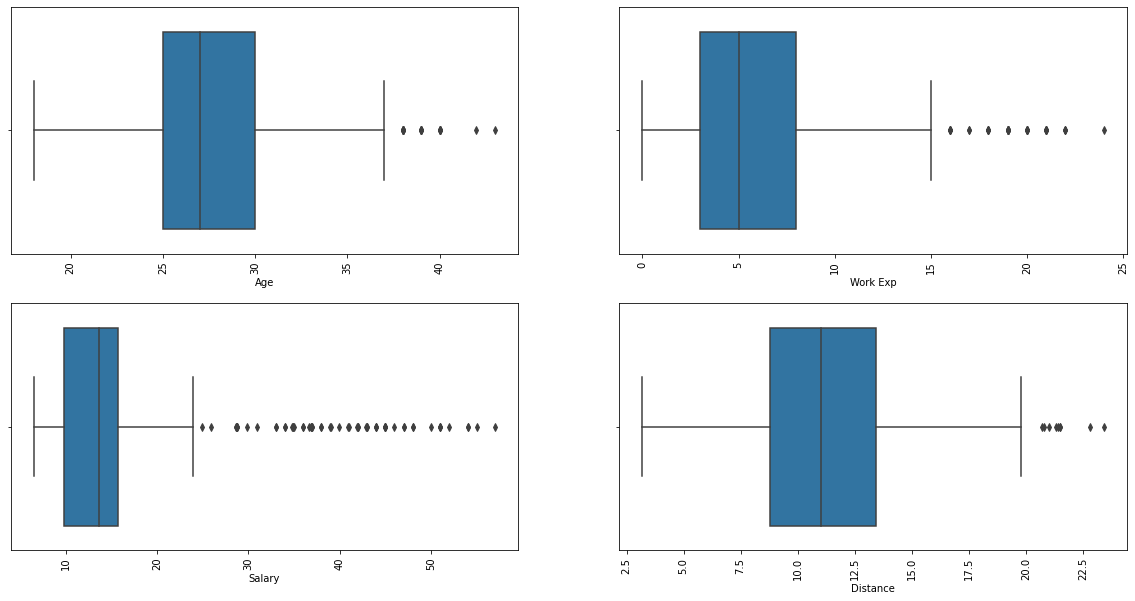

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

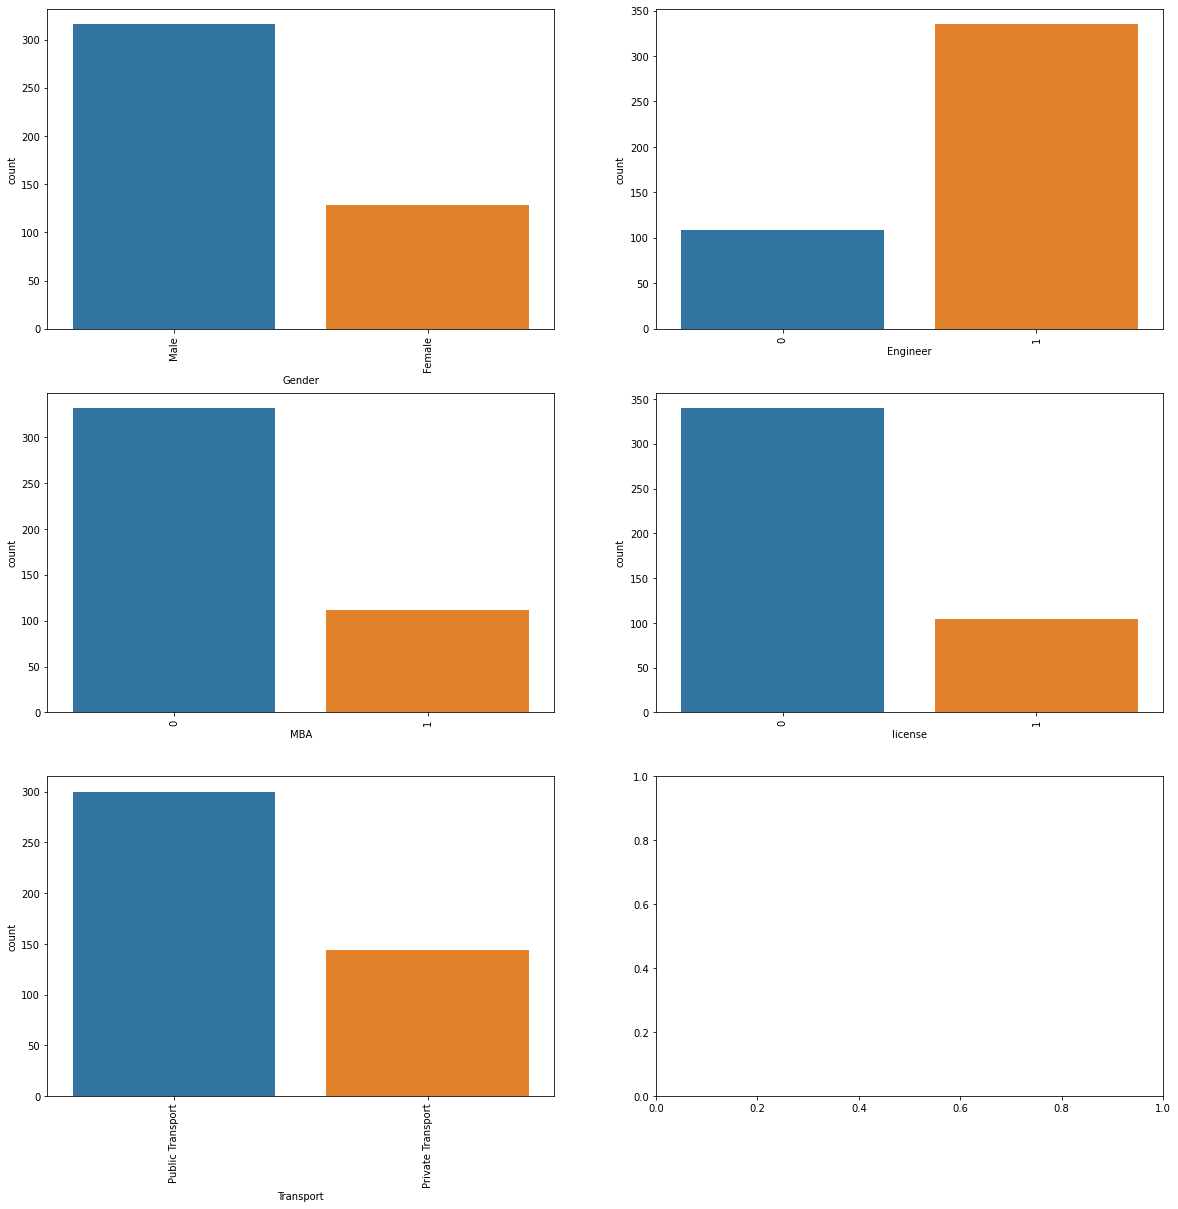

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, subplot in zip(cat, ax.flatten()):
    sns.countplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

**Multi-variate Data visualisation**

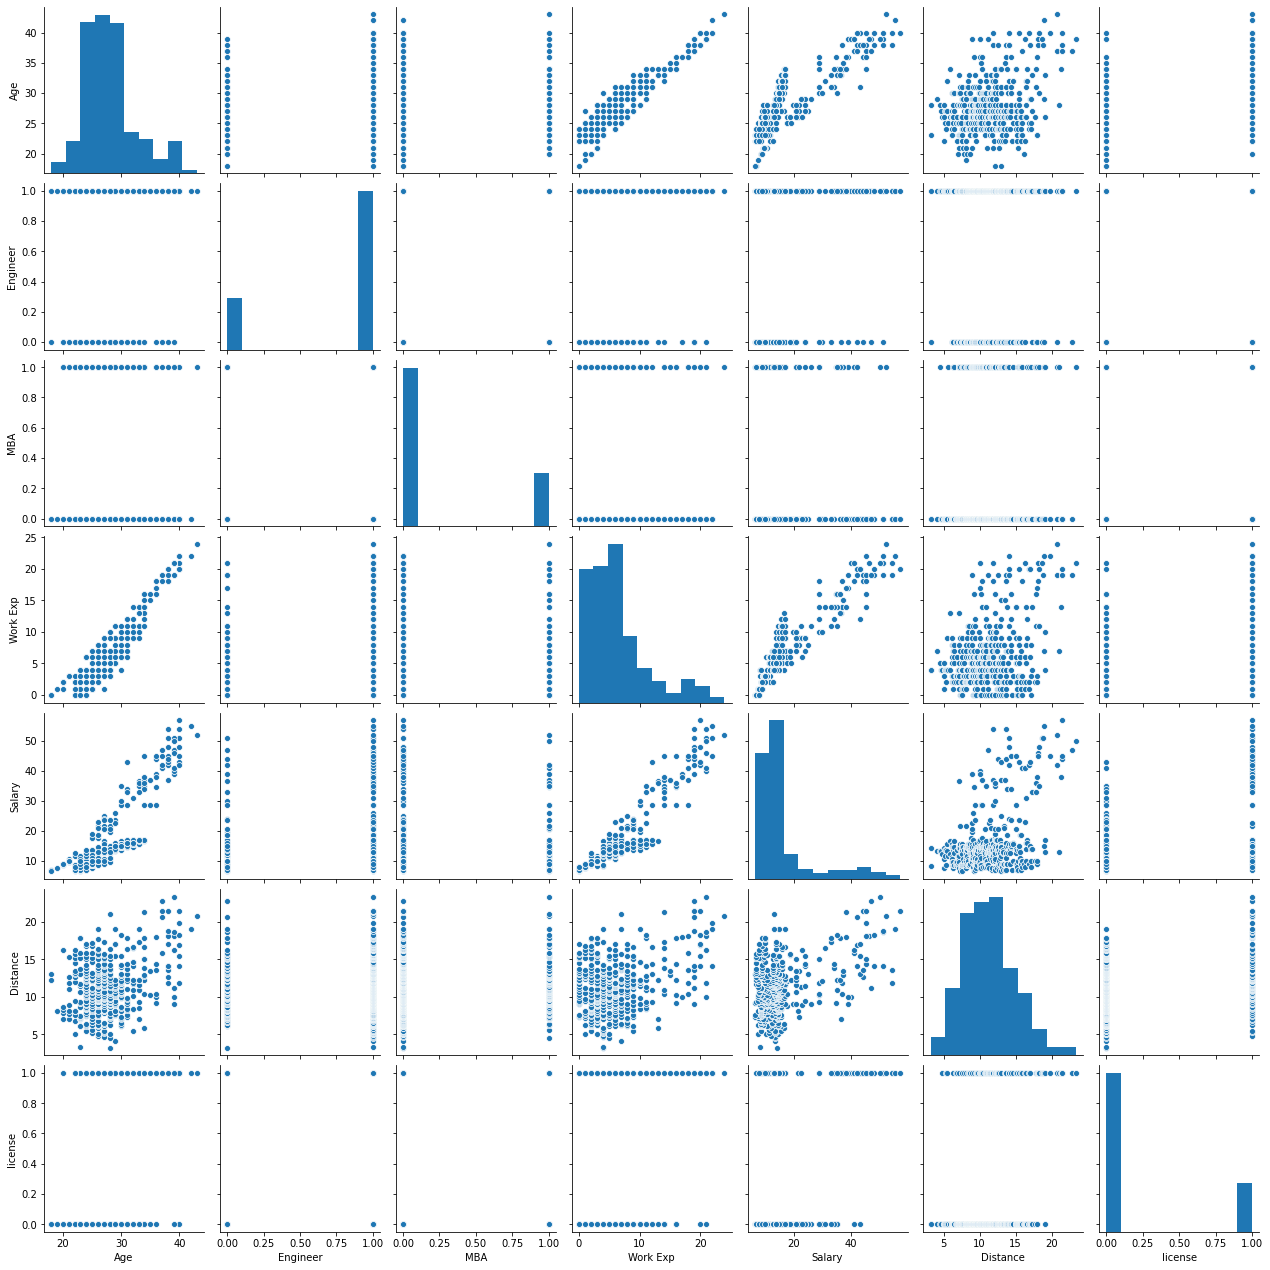

In [23]:
sns.pairplot(df)

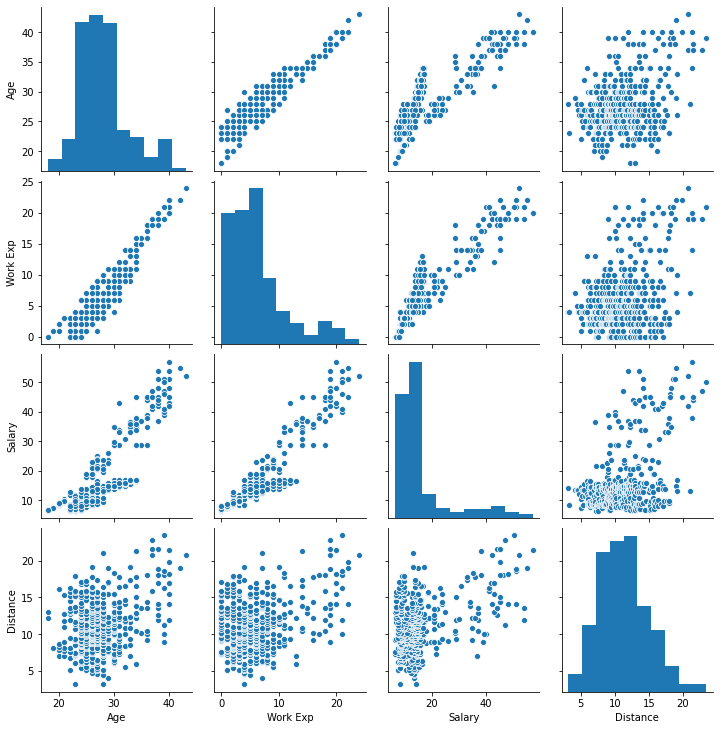

In [24]:
sns.pairplot(df[num])

**Outlier Treatment**

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])


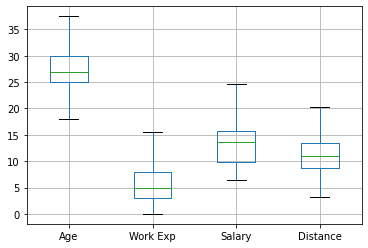

In [27]:
df[num].boxplot()

**Checking for Correlations**

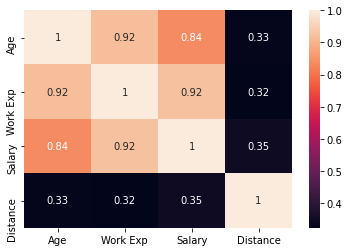

In [28]:
sns.heatmap(df.corr(), annot=True)

# **One Hot Encoding**

In [29]:
#dropping the target variable form the list cat
cat.remove('Transport')

In [30]:
print("cat",cat)
print("num",num)

cat ['Gender', 'Engineer', 'MBA', 'license']
num ['Age', 'Work Exp', 'Salary', 'Distance']


In [31]:
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,Male,0,0,4.0,14.3,3.2,0,Public Transport
1,23.0,Female,1,0,4.0,8.3,3.3,0,Public Transport
2,29.0,Male,1,0,7.0,13.4,4.1,0,Public Transport
3,28.0,Female,1,1,5.0,13.4,4.5,0,Public Transport
4,27.0,Male,1,0,4.0,13.4,4.6,0,Public Transport
5,26.0,Male,1,0,4.0,12.3,4.8,1,Public Transport
6,28.0,Male,1,0,5.0,14.4,5.1,0,Private Transport
7,26.0,Female,1,0,3.0,10.5,5.1,0,Public Transport
8,22.0,Male,1,0,1.0,7.5,5.1,0,Public Transport
9,27.0,Male,1,0,4.0,13.5,5.2,0,Public Transport


In [32]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [33]:
df.head(10)

,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3,3.2,Public Transport,1,0,0,0
1,23.0,4.0,8.3,3.3,Public Transport,0,1,0,0
2,29.0,7.0,13.4,4.1,Public Transport,1,1,0,0
3,28.0,5.0,13.4,4.5,Public Transport,0,1,1,0
4,27.0,4.0,13.4,4.6,Public Transport,1,1,0,0
5,26.0,4.0,12.3,4.8,Public Transport,1,1,0,1
6,28.0,5.0,14.4,5.1,Private Transport,1,1,0,0
7,26.0,3.0,10.5,5.1,Public Transport,0,1,0,0
8,22.0,1.0,7.5,5.1,Public Transport,1,1,0,0
9,27.0,4.0,13.5,5.2,Public Transport,1,1,0,0


Getting codes for Transport

In [34]:
df['Transport'] = pd.Categorical(df['Transport']).codes

In [35]:
df.head(10)

,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3,3.2,1,1,0,0,0
1,23.0,4.0,8.3,3.3,1,0,1,0,0
2,29.0,7.0,13.4,4.1,1,1,1,0,0
3,28.0,5.0,13.4,4.5,1,0,1,1,0
4,27.0,4.0,13.4,4.6,1,1,1,0,0
5,26.0,4.0,12.3,4.8,1,1,1,0,1
6,28.0,5.0,14.4,5.1,0,1,1,0,0
7,26.0,3.0,10.5,5.1,1,0,1,0,0
8,22.0,1.0,7.5,5.1,1,1,1,0,0
9,27.0,4.0,13.5,5.2,1,1,1,0,0


# **Scaling of the data**



In [36]:
print(num)

['Age', 'Work Exp', 'Salary', 'Distance']


Removing Age and Salary, since they are the highly correlated variables

In [37]:
num1= ['Work Exp', 'Distance']

In [38]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [39]:
df2=df.drop(['Age','Salary'], axis=1)
df2.head()

,Work Exp,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,0.258065,0.000000,1,1,0,0,0
1,0.258065,0.005827,1,0,1,0,0
2,0.451613,0.052440,1,1,1,0,0
3,0.322581,0.075747,1,0,1,1,0
4,0.258065,0.081573,1,1,1,0,0


**Train Test Split**

In [40]:
# Copy all the predictor variables into X dataframe
X = df2.drop('Transport', axis=1)

# Copy target into the y dataframe. 
y = df2['Transport']

In [41]:
X.head()

,Work Exp,Distance,Gender_Male,Engineer_1,MBA_1,license_1
0,0.258065,0.000000,1,0,0,0
1,0.258065,0.005827,0,1,0,0
2,0.451613,0.052440,1,1,0,0
3,0.322581,0.075747,0,1,1,0
4,0.258065,0.081573,1,1,0,0


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Transport, dtype: int8

In [43]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

# **Logistic Regression**

In [44]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

Predicting on Training and Test dataset

In [45]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Getting the Predicted Classes and Probs

In [46]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.197218,0.802782
1,0.702567,0.297433
2,0.377508,0.622492
3,0.126573,0.873427
4,0.049146,0.950854


Model **Evaluation**

In [47]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8354838709677419

AUC and ROC for the training data

AUC: 0.855


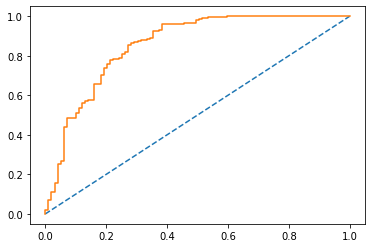

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [49]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.7686567164179104

AUC and ROC for the test data

AUC: 0.855


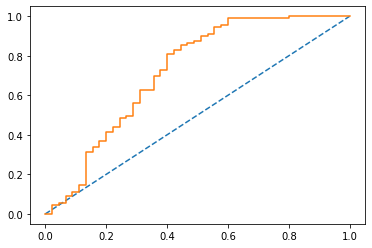

In [50]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

Confusion Matrix for the training data

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[ 64,  35],
       [ 16, 195]])

In [52]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        99
           1       0.85      0.92      0.88       211

    accuracy                           0.84       310
   macro avg       0.82      0.79      0.80       310
weighted avg       0.83      0.84      0.83       310



Confusion Matrix for test data

In [53]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[18, 27],
       [ 4, 85]])

In [54]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.7686567164179104

In [55]:
print(classification_report(y_test, ytest_predict))


              precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.76      0.96      0.85        89

    accuracy                           0.77       134
   macro avg       0.79      0.68      0.69       134
weighted avg       0.78      0.77      0.74       134



# **Linear Discriminant Analysis**

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [57]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8419354838709677
[[ 63  36]
 [ 13 198]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72        99
           1       0.85      0.94      0.89       211

    accuracy                           0.84       310
   macro avg       0.84      0.79      0.80       310
weighted avg       0.84      0.84      0.84       310



In [58]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7761194029850746
[[19 26]
 [ 4 85]]
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        45
           1       0.77      0.96      0.85        89

    accuracy                           0.78       134
   macro avg       0.80      0.69      0.70       134
weighted avg       0.79      0.78      0.75       134



## **Decision Tree**

In [59]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[ 99   0]
 [  0 211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       211

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [61]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8059701492537313
[[27 18]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.68        45
           1       0.82      0.91      0.86        89

    accuracy                           0.81       134
   macro avg       0.79      0.76      0.77       134
weighted avg       0.80      0.81      0.80       134



# **Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [63]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[ 99   0]
 [  0 211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       211

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [64]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8134328358208955
[[25 20]
 [ 5 84]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        45
           1       0.81      0.94      0.87        89

    accuracy                           0.81       134
   macro avg       0.82      0.75      0.77       134
weighted avg       0.82      0.81      0.80       134



# **KNN Model**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.832258064516129
[[ 58  41]
 [ 11 200]]
              precision    recall  f1-score   support

           0       0.84      0.59      0.69        99
           1       0.83      0.95      0.88       211

    accuracy                           0.83       310
   macro avg       0.84      0.77      0.79       310
weighted avg       0.83      0.83      0.82       310



In [67]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[15 30]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.94      0.33      0.49        45
           1       0.75      0.99      0.85        89

    accuracy                           0.77       134
   macro avg       0.84      0.66      0.67       134
weighted avg       0.81      0.77      0.73       134



# **Extreme Gradient Boost**

In [68]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8774193548387097
[[ 66  33]
 [  5 206]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        99
           1       0.86      0.98      0.92       211

    accuracy                           0.88       310
   macro avg       0.90      0.82      0.85       310
weighted avg       0.88      0.88      0.87       310



In [70]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8134328358208955
[[22 23]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.92      0.49      0.64        45
           1       0.79      0.98      0.87        89

    accuracy                           0.81       134
   macro avg       0.85      0.73      0.76       134
weighted avg       0.83      0.81      0.79       134

